# Math 428 - Homework for 04/22/19

## Problem 25.16

$$m\frac{d^2x}{dt^2}+c\frac{dx}{dt}+kx=0$$

With $m=20kg$, $c=5, 40, 200 Ns/m$, $k=20N/m$, $x'(0)=0$, $x(0)=1m$. Solve for $0\leq t\leq 15$.

$$\frac{dx}{dt}=z$$

$$\frac{d^2x}{dt^2}=\frac{dz}{dt}=\frac{-kx-cz}{m}$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Fourth-order Runge-Kutta method for two simultaneous ODEs
def second_order_runge_kutta(dy_dx, dz_dx, initial=[0, 0],
                             x_bounds=[0, 0], h=0.1, c_val=5):
    x, y = [initial[0]], [initial[1]]
    for i in range(1, int((x_bounds[1] - x_bounds[0]) / h) + 1):
        x_n, y_n = x[-1], y[-1] # t, y, z
        
        k1 = h * dy_dx(x_n, y_n)
        m1 = h * dz_dx(x_n, y_n, c_val)
        k2 = h * dy_dx(x_n + k1 / 2, y_n + m1 / 2)
        m2 = h * dz_dx(x_n + k1 / 2, y_n + m1 / 2, c_val)
        k3 = h * dy_dx(x_n + k2 / 2, y_n + m2 / 2)
        m3 = h * dz_dx(x_n + k2 / 2, y_n + m2 / 2, c_val)
        k4 = h * dy_dx(x_n + k3, y_n + m3)
        m4 = h * dz_dx(x_n + k3, y_n + m3, c_val)
        
        x.append(x_n + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        y.append(y_n + (m1 + 2 * m2 + 2 * m3 + m4) / 6)
        
    return x, y

In [13]:
# Function definition of dx/dt
def dx_dt(x, z):
    return z

# Function definition of dx2/dt2
def dz_dt(x, z, c):
    return (-20 * x - c * z) / 20

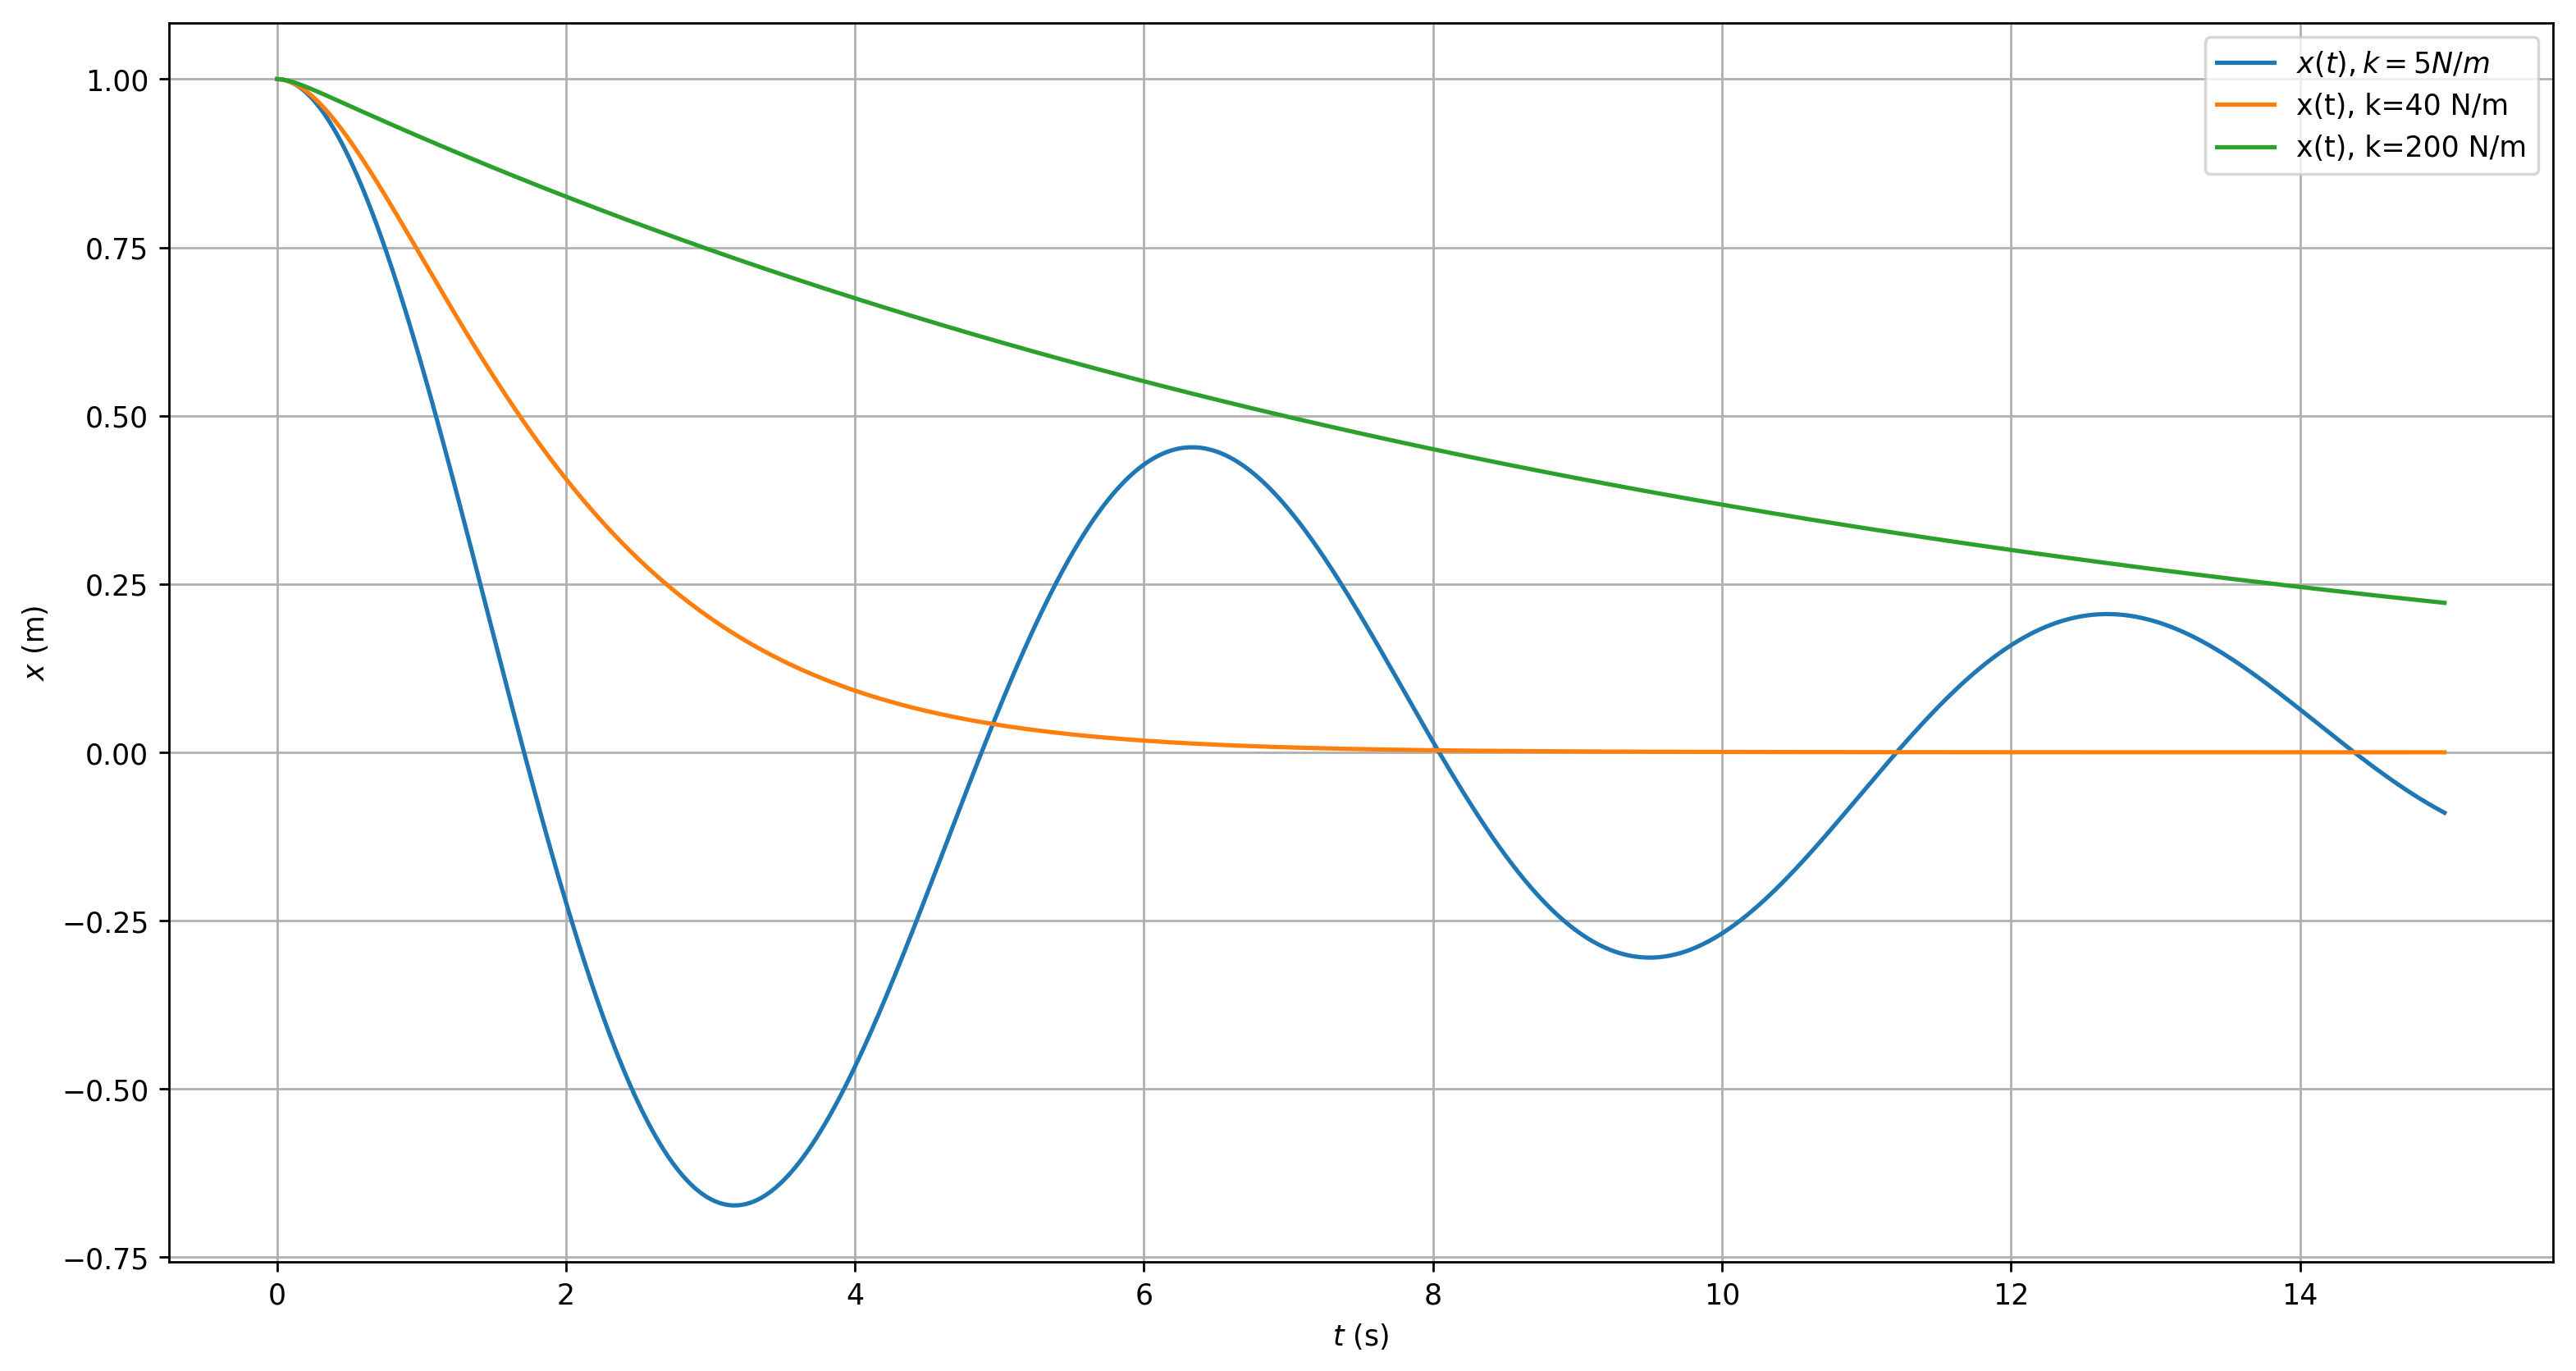

In [19]:
# Generate the time-axis
step_size = 0.001
t = np.arange(0, 15 + step_size, step_size)

# Numerically solve the ODEs
x1, v1 = second_order_runge_kutta(dx_dt, dz_dt, [1, 0], [0, 15], step_size, c_val=5)
x2, v2 = second_order_runge_kutta(dx_dt, dz_dt, [1, 0], [0, 15], step_size, c_val=40)
x3, v3 = second_order_runge_kutta(dx_dt, dz_dt, [1, 0], [0, 15], step_size, c_val=200)

# Plot the resulting solutions
plt.figure(figsize=(15, 8), dpi=250)
plt.plot(t, x1, label="x(t), k=5 N/m")
plt.plot(t, x2, label="x(t), k=40 N/m")
plt.plot(t, x3, label="x(t), k=200 N/m")
plt.xlabel("$t$ (s)")
plt.ylabel("$x$ (m)")
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

The three different damping solutions are shown above. Clearly, the underdamped condition exhibits sinusoidal behavior, while the other two are far more akin to a negative exponential curve. Nonetheless, the RK4 method of solving a second order ODE through decomposition was very effective. Although the method does seem a bit confusing, at least at first, the actual implementation is very direct. And after verifying the numerical solutions with the numerical ones, it is clearly a very robust way to solve higher order differential equations.